<a href="https://colab.research.google.com/github/albuquerquehellen/validacaodehipoteses/blob/main/Laboratoria_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Limpeza de Dados**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Laboratoria/Projeto 5 - ML/rh_data.csv')

In [ ]:
# Mostra as primeira linhas da tabela, o que ajuda a entender a estrutura geral dos dados, ver os valores e formatos e confirmar se o arquivo foi carregado corretamente.

display(df.head())

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
# São extraídas as principais informações técnicas sobre os dados.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
# Para cada coluna, conta quantos valores únicos existem
valores_unicos = df.nunique()

# Filtra as colunas que têm apenas 1 valor único (constantes)
colunas_constantes = valores_unicos[valores_unicos == 1].index.tolist()

print("Colunas constantes (com um único valor):", colunas_constantes)

Colunas constantes (com um único valor): ['EmployeeCount', 'Over18', 'StandardHours']


In [ ]:
# Drop é usado para remover linhas ou colunas.
# inplace=True é usado para que as modificações sejam feitas no DF original.

df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  PercentSalaryHike       

In [ ]:
# Por serem poucos nulos, vamos substituí-los pela mediana, que é menos sensível aos outliers.

df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].median())
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].median())

In [ ]:
print(df[['NumCompaniesWorked', 'TotalWorkingYears']].isnull().sum())

NumCompaniesWorked    0
TotalWorkingYears     0
dtype: int64


In [ ]:
colunas_texto = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

# Vamos deixar tudo em minúsculas para padronizar.
for coluna in colunas_texto:
    df[coluna] = df[coluna].str.lower()

In [ ]:
# Verificar valores únicos de cada coluna categórica
for coluna in colunas_texto:
    print(f"Valores únicos na coluna '{coluna}':")
    print(df[coluna].unique())
    print("-" * 50)

Valores únicos na coluna 'Attrition':
['no' 'yes']
--------------------------------------------------
Valores únicos na coluna 'BusinessTravel':
['travel_rarely' 'travel_frequently' 'non-travel']
--------------------------------------------------
Valores únicos na coluna 'Department':
['sales' 'research & development' 'human resources']
--------------------------------------------------
Valores únicos na coluna 'EducationField':
['life sciences' 'other' 'medical' 'marketing' 'technical degree'
 'human resources']
--------------------------------------------------
Valores únicos na coluna 'Gender':
['female' 'male']
--------------------------------------------------
Valores únicos na coluna 'JobRole':
['healthcare representative' 'research scientist' 'sales executive'
 'human resources' 'research director' 'laboratory technician'
 'manufacturing director' 'sales representative' 'manager']
--------------------------------------------------
Valores únicos na coluna 'MaritalStatus':
['marr

In [ ]:
# Checar duplicados

duplicatas = df.duplicated().sum()
print(f"O número de linhas duplicadas: {duplicatas}")

O número de linhas duplicadas: 0


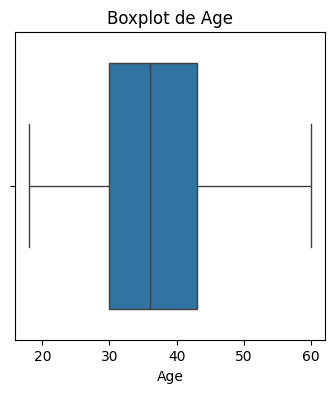

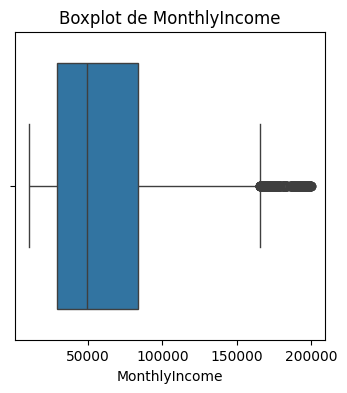

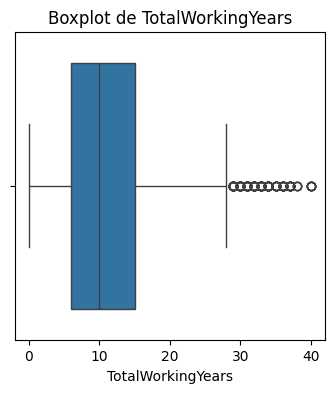

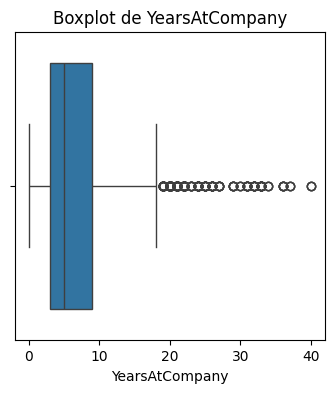

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colunas_numericas = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']

for coluna in colunas_numericas:
    plt.figure(figsize=(4,4))
    sns.boxplot(x=df[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.show()

In [ ]:
# Analisando outliers pelo IQR para cada coluna numérica
for coluna in colunas_numericas:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    num_outliers = outliers.shape[0]

    print(f"{coluna}: {num_outliers} outliers")


Age: 0 outliers
MonthlyIncome: 342 outliers
TotalWorkingYears: 189 outliers
YearsAtCompany: 312 outliers


In [ ]:
for coluna in ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Substituindo os outliers pelos limites
    df[coluna] = df[coluna].apply(lambda x: limite_inferior if x < limite_inferior else limite_superior if x > limite_superior else x)

In [ ]:
# Analisando outliers pelo IQR para cada coluna numérica
for coluna in colunas_numericas:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    num_outliers = outliers.shape[0]

    print(f"{coluna}: {num_outliers} outliers")

Age: 0 outliers
MonthlyIncome: 0 outliers
TotalWorkingYears: 0 outliers
YearsAtCompany: 0 outliers


In [ ]:
label_encoders = {}
for coluna in colunas_texto:
  le = LabelEncoder()
  df[coluna] = le.fit_transform(df[coluna])
  label_encoders[coluna] = le

In [ ]:
for col in label_encoders:
    le = label_encoders[col]
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Coluna '{col}': {mapping}")

Coluna 'Attrition': {'no': np.int64(0), 'yes': np.int64(1)}
Coluna 'BusinessTravel': {'non-travel': np.int64(0), 'travel_frequently': np.int64(1), 'travel_rarely': np.int64(2)}
Coluna 'Department': {'human resources': np.int64(0), 'research & development': np.int64(1), 'sales': np.int64(2)}
Coluna 'EducationField': {'human resources': np.int64(0), 'life sciences': np.int64(1), 'marketing': np.int64(2), 'medical': np.int64(3), 'other': np.int64(4), 'technical degree': np.int64(5)}
Coluna 'Gender': {'female': np.int64(0), 'male': np.int64(1)}
Coluna 'JobRole': {'healthcare representative': np.int64(0), 'human resources': np.int64(1), 'laboratory technician': np.int64(2), 'manager': np.int64(3), 'manufacturing director': np.int64(4), 'research director': np.int64(5), 'research scientist': np.int64(6), 'sales executive': np.int64(7), 'sales representative': np.int64(8)}
Coluna 'MaritalStatus': {'divorced': np.int64(0), 'married': np.int64(1), 'single': np.int64(2)}


In [ ]:
# Criamos um novo DF apenas com as Variáveis Explicativas
# axis=1 → Indica que queremos remover a coluna (e não uma linha — que seria axis=0).

X = df.drop('Attrition', axis=1)

# Variável Resposta
y = df['Attrition']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,                 # dados
    test_size=0.2,        # 20% para teste, 80% para treino
    random_state=42,      # semente fixa para reprodutibilidade
    stratify=y            # mantém a proporção da variável resposta
)

In [ ]:
# Contando as classes na base de treino
print("Proporção no conjunto de treino:")
print(y_train.value_counts(normalize=True))

# Contando as classes na base de teste
print("\nProporção no conjunto de teste:")
print(y_test.value_counts(normalize=True))

# normalize=True no value_counts(), transforma contagem absoluta em proporção relativa. Essa função dividea quuantidade de vezes que uma variável aparece pela quantidade de vezes que todas aparecem.

Proporção no conjunto de treino:
Attrition
0    0.838719
1    0.161281
Name: proportion, dtype: float64

Proporção no conjunto de teste:
Attrition
0    0.839002
1    0.160998
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

# Criar o objeto SMOTE, definir random_state para reproducibilidade
smote = SMOTE(random_state=42)

# Aplicar SMOTE apenas nos dados de treino
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Agora X_train_smote e y_train_smote estão balanceados

In [ ]:
# 0. Tratar valores nulos para evitar NaNs nas operações posteriores
df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].median(), inplace=True)
df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].median(), inplace=True)
df['YearsSinceLastPromotion'].fillna(0, inplace=True)
df['YearsAtCompany'].fillna(1, inplace=True)  # evita divisão por zero
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['DistanceFromHome'].fillna(0, inplace=True)
df['BusinessTravel'].fillna('0', inplace=True)  # preencher com string '0' para evitar erro na conversão
df['StockOptionLevel'].fillna(0, inplace=True)
df['TrainingTimesLastYear'].fillna(0, inplace=True)

# 1. Converter BusinessTravel para inteiro (pois já está como código numérico)
df['BusinessTravelNum'] = df['BusinessTravel'].astype(int)

# 2. Criar novas variáveis com proteção contra divisão por zero ou valores nulos
df['AvgYearsPerCompany'] = df.apply(
    lambda x: x['TotalWorkingYears'] / x['NumCompaniesWorked'] if x['NumCompaniesWorked'] > 0 else x['TotalWorkingYears'],
    axis=1)
df['PromoRatio'] = df.apply(
    lambda x: x['YearsSinceLastPromotion'] / x['YearsAtCompany'] if x['YearsAtCompany'] > 0 else 0,
    axis=1)
df['AnnualIncomePerYearAtCompany'] = (df['MonthlyIncome'] * 12) / df['YearsAtCompany']
df['DistTravelScore'] = df['BusinessTravelNum'] * df['DistanceFromHome']
df['StockIncomeImpact'] = (df['StockOptionLevel'] + 1) * (df['MonthlyIncome'] * 12)

# 3. Criar bins categóricos para idade, renda e treinamento
df['Age_bin'] = pd.cut(df['Age'],
                       bins=[17, 30, 40, 50, 70],
                       labels=['Jovem', 'AdultoJr', 'AdultoSr', 'Veterano'],
                       ordered=True)
df['Income_bin'] = pd.qcut(df['MonthlyIncome'],
                           q=4,
                           labels=['Baixo', 'Médio', 'Alto', 'Muito Alto'],
                           duplicates='drop')
df['Income_bin'] = df['Income_bin'].cat.as_ordered()
df['Training_bin'] = pd.cut(df['TrainingTimesLastYear'],
                            bins=[-1, 1, 3, 10],
                            labels=['Baixo', 'Médio', 'Alto'],
                            ordered=True)

# 4. Converter bins categóricos em códigos numéricos
df['Age_bin_num'] = df['Age_bin'].cat.codes.astype('int64')
df['Income_bin_num'] = df['Income_bin'].cat.codes.astype('int64')
df['Training_bin_num'] = df['Training_bin'].cat.codes.astype('int64')

# 5. Selecionar colunas numéricas para análise e incluir as variáveis criadas
novas_vars = ['AvgYearsPerCompany', 'PromoRatio', 'AnnualIncomePerYearAtCompany', 'DistTravelScore', 'StockIncomeImpact']
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in ['Age_bin_num', 'Income_bin_num', 'Training_bin_num'] + novas_vars:
    if col not in numeric_cols:
        numeric_cols.append(col)

# 6. Calcular matriz de correlação para as variáveis numéricas selecionadas
corr = df[numeric_cols].corr()

# 7. Mostrar a correlação das novas variáveis com a variável alvo 'Attrition'
print("\nCorrelação das novas variáveis com 'Attrition':")
print(corr.loc[novas_vars + ['Age_bin_num', 'Income_bin_num', 'Training_bin_num'], 'Attrition'])



Correlação das novas variáveis com 'Attrition':
AvgYearsPerCompany             -0.158004
PromoRatio                      0.030536
AnnualIncomePerYearAtCompany    0.144475
DistTravelScore                -0.004602
StockIncomeImpact              -0.018812
Age_bin_num                    -0.132170
Income_bin_num                 -0.030060
Training_bin_num               -0.043262
Name: Attrition, dtype: float64


/tmp/ipython-input-86-260138540.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].median(), inplace=True)
/tmp/ipython-input-86-260138540.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,PromoRatio,AnnualIncomePerYearAtCompany,DistTravelScore,StockIncomeImpact,Age_bin,Income_bin,Training_bin,Age_bin_num,Income_bin_num,Training_bin_num
0,51,0,2,2,6,2,1,1,0,1,...,0.000,1573920.0,12,1573920.0,Veterano,Muito Alto,Alto,3,3,2
1,31,1,1,1,10,1,1,2,0,1,...,0.200,100536.0,10,1005360.0,AdultoJr,Médio,Médio,1,1,1
2,32,0,1,1,17,4,4,3,1,4,...,0.000,398004.0,17,7960080.0,AdultoJr,Muito Alto,Médio,1,3,1
3,38,0,0,1,2,5,1,4,1,3,...,0.875,124815.0,0,3994080.0,AdultoJr,Alto,Alto,1,2,2
4,32,0,2,1,10,1,3,5,1,1,...,0.000,46840.0,20,843120.0,AdultoJr,Baixo,Médio,1,0,1


**Análise Exploratória**

In [ ]:
# Colunas categóricas com LabelEncoder
colunas_categoricas = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

# Colunas que já são categóricas legíveis (bins)
colunas_bins = ['Age_bin', 'Income_bin', 'Training_bin']

print("Taxa média de Attrition agrupada por variáveis categóricas:\n")

# Primeiro para as que foram LabelEncoded
for col in colunas_categoricas:
    le = label_encoders[col]
    agrupado = df.groupby(col)['Attrition'].mean()
    # Traduzir índices de volta para categorias originais
    agrupado.index = le.inverse_transform(agrupado.index.astype(int))
    print(f"\nTaxa média de Attrition por {col}:")
    print(agrupado.sort_values(ascending=False))

# Depois para as colunas bins que são categóricas legíveis
for col in colunas_bins:
    agrupado = df.groupby(col)['Attrition'].mean()
    print(f"\nTaxa média de Attrition por {col}:")
    print(agrupado.sort_values(ascending=False))


Taxa média de Attrition agrupada por variáveis categóricas:


Taxa média de Attrition por BusinessTravel:
travel_frequently    0.249097
travel_rarely        0.149569
non-travel           0.080000
Name: Attrition, dtype: float64

Taxa média de Attrition por Department:
human resources           0.301587
research & development    0.157128
sales                     0.150224
Name: Attrition, dtype: float64

Taxa média de Attrition por EducationField:
human resources     0.407407
life sciences       0.166667
medical             0.161638
marketing           0.157233
other               0.121951
technical degree    0.113636
Name: Attrition, dtype: float64

Taxa média de Attrition por Gender:
male      0.166667
female    0.153061
Name: Attrition, dtype: float64

Taxa média de Attrition por JobRole:
research director            0.237500
research scientist           0.181507
sales executive              0.168712
laboratory technician        0.162162
healthcare representative    0.145038
sales re

/tmp/ipython-input-88-1567276015.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupado = df.groupby(col)['Attrition'].mean()


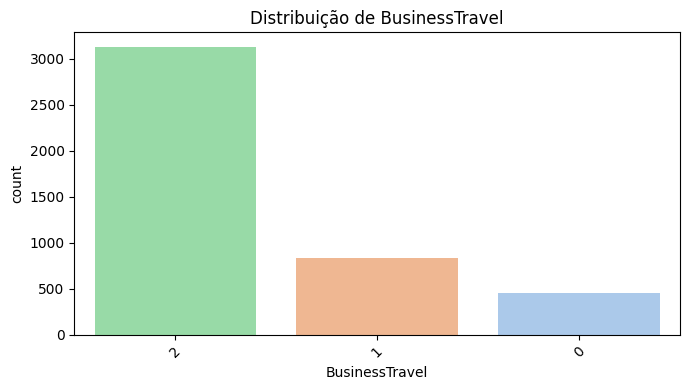

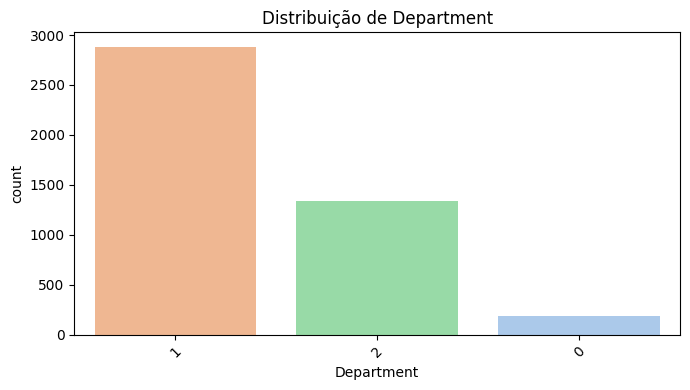

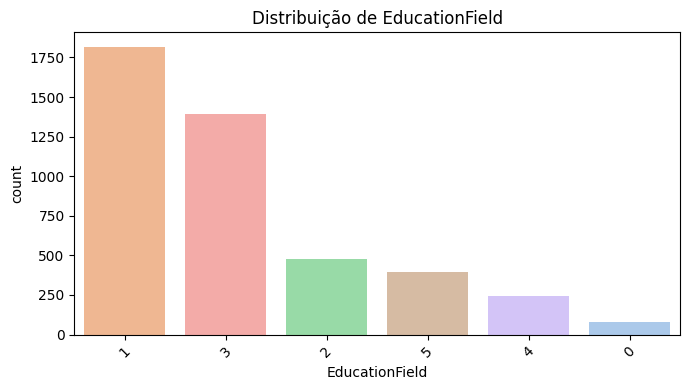

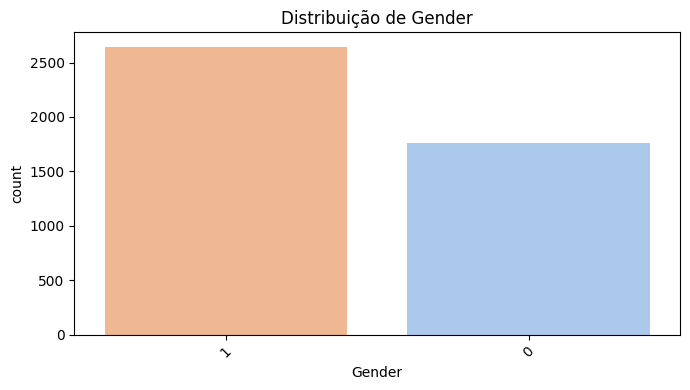

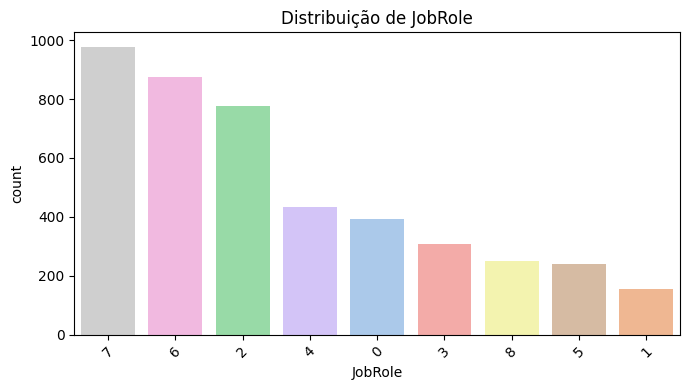

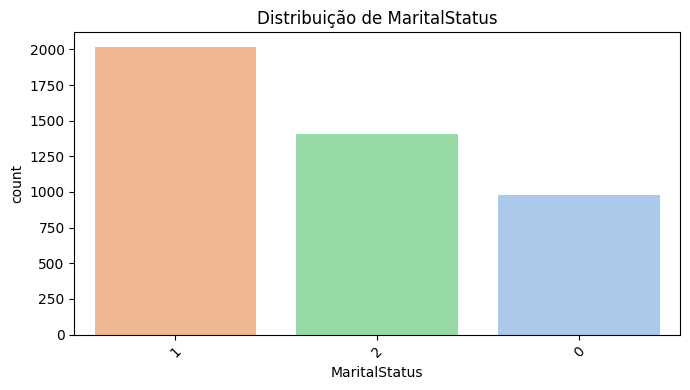

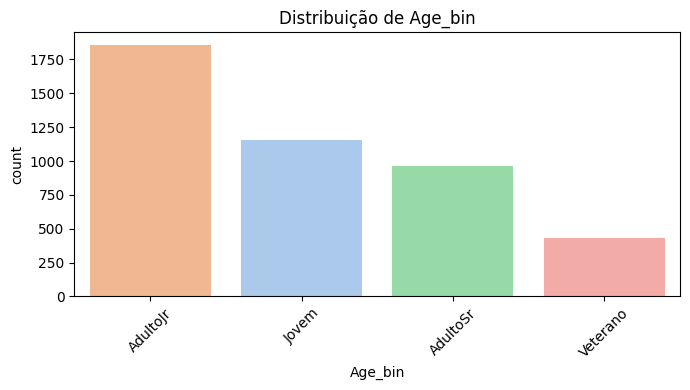

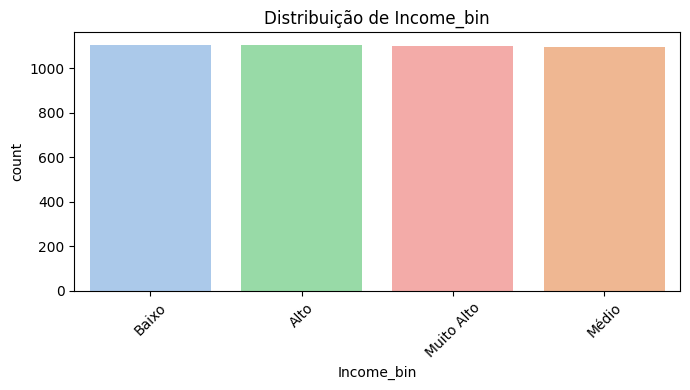

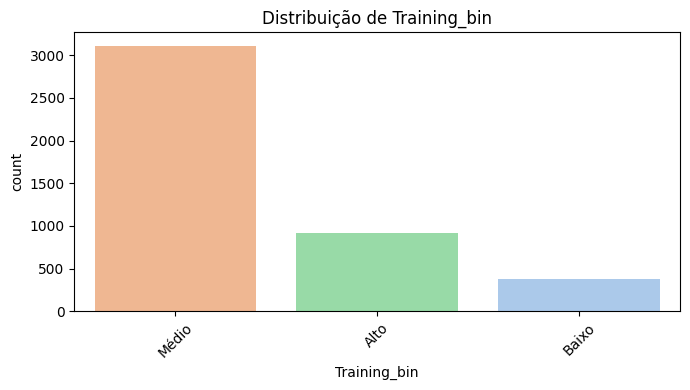

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the original column names that were label encoded
colunas_categoricas_para_plot = colunas_categoricas + colunas_bins

for col in colunas_categoricas_para_plot:
    plt.figure(figsize=(7,4))
    sns.countplot(x=df[col], hue=df[col], palette="pastel", order=df[col].value_counts().index, legend=False)
    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# categorical_cols_legiveis = [col + '_label' for col in colunas_categoricas] + colunas_bins
categorical_cols_legiveis = colunas_categoricas + colunas_bins

print("Distribuição percentual das categorias:\n")

for col in categorical_cols_legiveis:
    distrib = df[col].value_counts(normalize=True).sort_values(ascending=False) * 100
    print(f"Distribuição em {col.replace('_label','')} (%):")
    for categoria, perc in distrib.items():
        print(f"  {categoria}: {perc:.2f}%")
    print("-" * 40)

Distribuição percentual das categorias:

Distribuição em BusinessTravel (%):
  2: 70.95%
  1: 18.84%
  0: 10.20%
----------------------------------------
Distribuição em Department (%):
  1: 65.37%
  2: 30.34%
  0: 4.29%
----------------------------------------
Distribuição em EducationField (%):
  1: 41.22%
  3: 31.56%
  2: 10.82%
  5: 8.98%
  4: 5.58%
  0: 1.84%
----------------------------------------
Distribuição em Gender (%):
  1: 60.00%
  0: 40.00%
----------------------------------------
Distribuição em JobRole (%):
  7: 22.18%
  6: 19.86%
  2: 17.62%
  4: 9.86%
  0: 8.91%
  3: 6.94%
  8: 5.65%
  5: 5.44%
  1: 3.54%
----------------------------------------
Distribuição em MaritalStatus (%):
  1: 45.78%
  2: 31.97%
  0: 22.24%
----------------------------------------
Distribuição em Age_bin (%):
  AdultoJr: 42.11%
  Jovem: 26.26%
  AdultoSr: 21.90%
  Veterano: 9.73%
----------------------------------------
Distribuição em Income_bin (%):
  Baixo: 25.10%
  Alto: 25.03%
  Muito Al

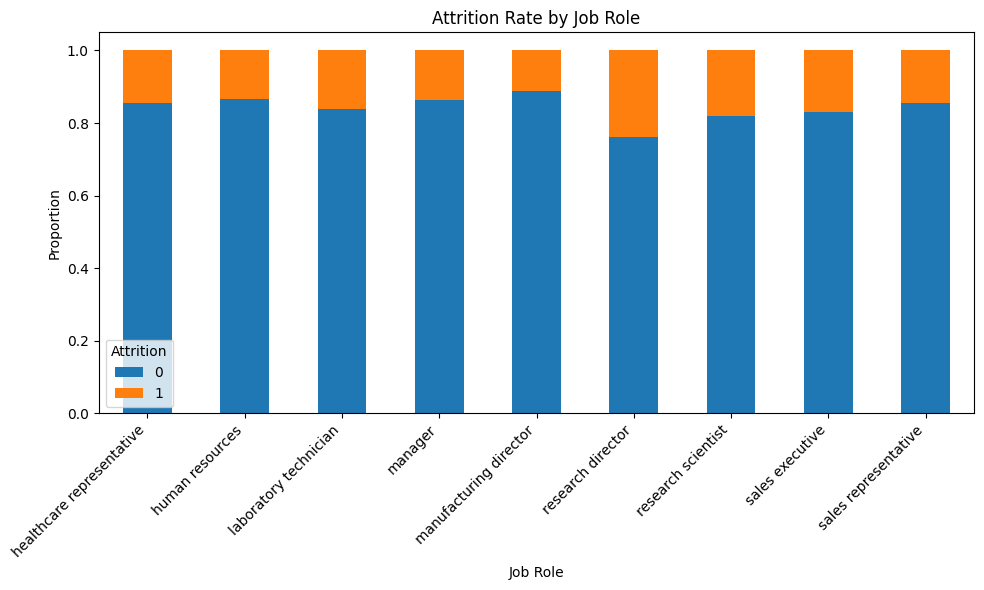

In [ ]:
# Decode 'JobRole' for plotting
job_role_le = label_encoders['JobRole']
df['JobRole_decoded'] = job_role_le.inverse_transform(df['JobRole'])

# Create cross-tabulation and plot with decoded labels
pd.crosstab(df['JobRole_decoded'], df['Attrition'], normalize='index').plot(kind='bar', stacked=True, figsize=(10, 6))

# Set title and labels
plt.title('Attrition Rate by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# Drop the temporary decoded column
df.drop(columns=['JobRole_decoded'], inplace=True)

<Axes: >

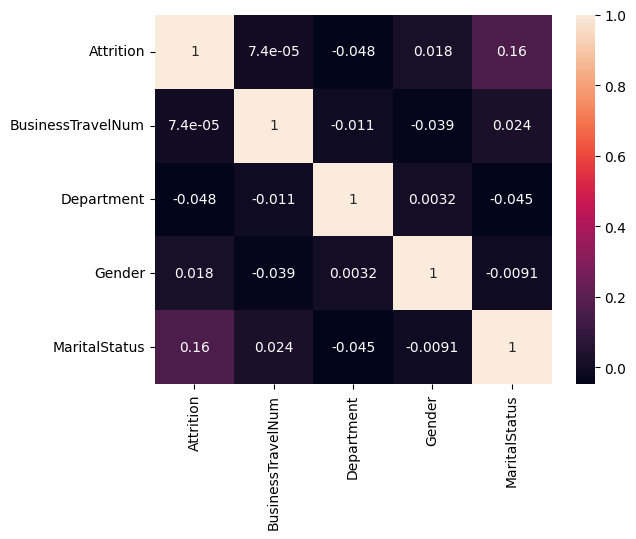

In [ ]:
sns.heatmap(df[['Attrition', 'BusinessTravelNum', 'Department', 'Gender', 'MaritalStatus']].corr(), annot=True)

In [ ]:
import pandas as pd
import numpy as np

# Seleciona apenas colunas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calcula matriz de correlação
corr_matrix = df[numeric_cols].corr()

# Correlação com 'Attrition', ordenada pelo valor absoluto (força da relação)
corr_with_attrition = corr_matrix['Attrition'].drop('Attrition').sort_values(key=lambda x: abs(x), ascending=False)

# Exibir o resultado
print("Correlação de variáveis numéricas com 'Attrition':\n")
print(corr_with_attrition)

Correlação de variáveis numéricas com 'Attrition':

TotalWorkingYears              -0.179683
YearsAtCompany                 -0.162211
MaritalStatus                   0.162070
Age                            -0.159205
AvgYearsPerCompany             -0.158004
YearsWithCurrManager           -0.156199
AnnualIncomePerYearAtCompany    0.144475
Age_bin_num                    -0.132170
EducationField                 -0.057940
TrainingTimesLastYear          -0.049431
Department                     -0.048206
Training_bin_num               -0.043262
NumCompaniesWorked              0.042064
YearsSinceLastPromotion        -0.033019
PercentSalaryHike               0.032533
MonthlyIncome                  -0.030996
PromoRatio                      0.030536
Income_bin_num                 -0.030060
JobRole                         0.025809
StockIncomeImpact              -0.018812
Gender                          0.018125
Education                      -0.015111
JobLevel                       -0.010290
Dista

In [ ]:
# Selecionar colunas numéricas
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Medidas de tendência central
tendencia_central = pd.DataFrame({
    'Média': df[colunas_numericas].mean(),
    'Mediana': df[colunas_numericas].median(),
    'Moda': df[colunas_numericas].mode().iloc[0]
})

print(tendencia_central)

                                     Média       Mediana       Moda
Age                           3.692381e+01  3.600000e+01       35.0
Attrition                     1.612245e-01  0.000000e+00        0.0
BusinessTravel                1.607483e+00  2.000000e+00        2.0
Department                    1.260544e+00  1.000000e+00        1.0
DistanceFromHome              9.192517e+00  7.000000e+00        2.0
Education                     2.912925e+00  3.000000e+00        3.0
EducationField                2.247619e+00  2.000000e+00        1.0
EmployeeID                    2.205500e+03  2.205500e+03        1.0
Gender                        6.000000e-01  1.000000e+00        1.0
JobLevel                      2.063946e+00  2.000000e+00        1.0
JobRole                       4.458503e+00  5.000000e+00        7.0
MaritalStatus                 1.097279e+00  1.000000e+00        1.0
MonthlyIncome                 6.362086e+04  4.919000e+04   165835.0
NumCompaniesWorked            2.691837e+00  2.00

In [ ]:
# Colunas categóricas codificadas e bins
colunas_categoricas = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
colunas_bins = ['Age_bin', 'Income_bin', 'Training_bin']

print("Distribuição percentual das categorias:\n")

# Primeiro para as codificadas com LabelEncoder
for col in colunas_categoricas:
    le = label_encoders[col]
    distribuicao = df[col].value_counts(normalize=True) * 100
    distribuicao.index = le.inverse_transform(distribuicao.index.astype(int))
    print(f"Distribuição em {col} (%):")
    for categoria, percentual in distribuicao.items():
        print(f"  {categoria}: {percentual:.2f}%")
    print('-' * 40)

# Agora para as bins legíveis
for col in colunas_bins:
    distribuicao = df[col].value_counts(normalize=True) * 100
    print(f"Distribuição em {col} (%):")
    for categoria, percentual in distribuicao.items():
        print(f"  {categoria}: {percentual:.2f}%")
    print('-' * 40)

Distribuição percentual das categorias:

Distribuição em BusinessTravel (%):
  travel_rarely: 70.95%
  travel_frequently: 18.84%
  non-travel: 10.20%
----------------------------------------
Distribuição em Department (%):
  research & development: 65.37%
  sales: 30.34%
  human resources: 4.29%
----------------------------------------
Distribuição em EducationField (%):
  life sciences: 41.22%
  medical: 31.56%
  marketing: 10.82%
  technical degree: 8.98%
  other: 5.58%
  human resources: 1.84%
----------------------------------------
Distribuição em Gender (%):
  male: 60.00%
  female: 40.00%
----------------------------------------
Distribuição em JobRole (%):
  sales executive: 22.18%
  research scientist: 19.86%
  laboratory technician: 17.62%
  manufacturing director: 9.86%
  healthcare representative: 8.91%
  manager: 6.94%
  sales representative: 5.65%
  research director: 5.44%
  human resources: 3.54%
----------------------------------------
Distribuição em MaritalStatus (%)

In [ ]:
# Medidas de dispersão
dispersao = pd.DataFrame({
    'Desvio Padrão': df[colunas_numericas].std(),
    'Amplitude': df[colunas_numericas].max() - df[colunas_numericas].min(),
    'Coef. de Variação (%)': (df[colunas_numericas].std() / df[colunas_numericas].mean()) * 100
})

print(dispersao)
# Medidas de dispersão
dispersao = pd.DataFrame({
    'Desvio Padrão': df[colunas_numericas].std(),
    'Amplitude': df[colunas_numericas].max() - df[colunas_numericas].min(),
    'Coef. de Variação (%)': (df[colunas_numericas].std() / df[colunas_numericas].mean()) * 100
})

print(dispersao)


                              Desvio Padrão  Amplitude  Coef. de Variação (%)
Age                            9.133301e+00       42.0              24.735533
Attrition                      3.677796e-01        1.0             228.116453
BusinessTravel                 6.653040e-01        2.0              41.387934
Department                     5.276726e-01        2.0              41.860696
DistanceFromHome               8.105026e+00       28.0              88.169818
Education                      1.023933e+00        4.0              35.151354
EducationField                 1.331067e+00        5.0              59.221206
EmployeeID                     1.273202e+03     4409.0              57.728482
Gender                         4.899535e-01        1.0              81.658917
JobLevel                       1.106689e+00        4.0              53.620058
JobRole                        2.461263e+00        8.0              55.203791
MaritalStatus                  7.299551e-01        2.0          

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Criar os modelos
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Treinar os modelos usando os dados balanceados
model_lr.fit(X_train_smote, y_train_smote)
model_rf.fit(X_train_smote, y_train_smote)
model_xgb.fit(X_train_smote, y_train_smote)

# Avaliar função já está pronta, só chamar
avaliar_modelo(model_lr, X_test, y_test, "Regressão Logística")
avaliar_modelo(model_rf, X_test, y_test, "Random Forest")
avaliar_modelo(model_xgb, X_test, y_test, "XGBoost")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Resultados para Regressão Logística:
Acurácia: 0.6904761904761905
Recall: 0.5211267605633803
Precision: 0.26523297491039427
F1-Score: 0.3515439429928741
Matriz de Confusão:
 [[535 205]
 [ 68  74]]

Relatório Completo:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80       740
           1       0.27      0.52      0.35       142

    accuracy                           0.69       882
   macro avg       0.58      0.62      0.57       882
weighted avg       0.79      0.69      0.73       882

----------------------------------------
Resultados para Random Forest:
Acurácia: 0.9943310657596371
Recall: 0.9788732394366197
Precision: 0.9858156028368794
F1-Score: 0.9823321554770318
Matriz de Confusão:
 [[738   2]
 [  3 139]]

Relatório Completo:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       0.99      0.98      0.98       142

    accuracy                         

/tmp/ipython-input-113-1878934607.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15], palette='viridis')


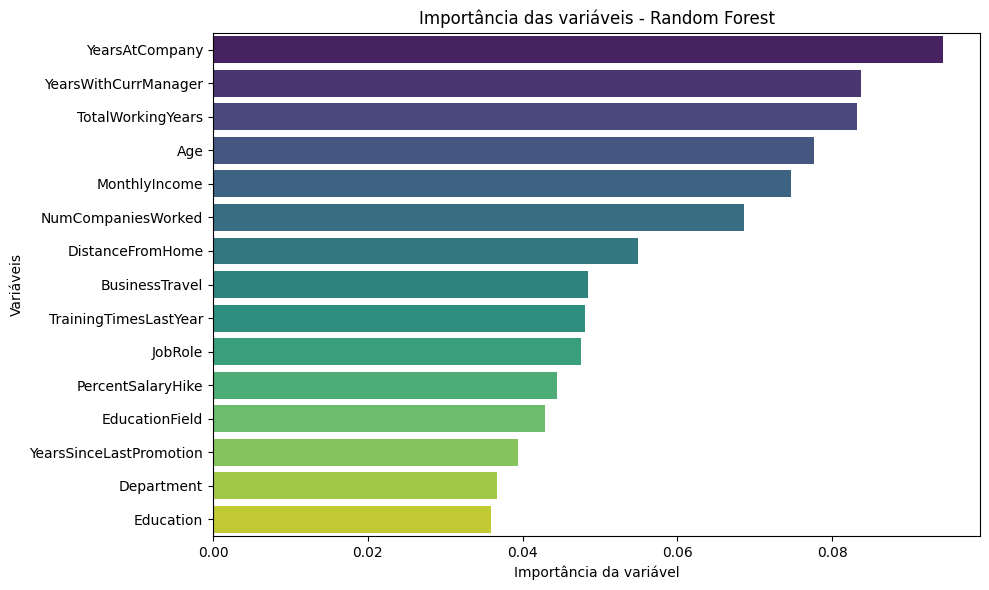

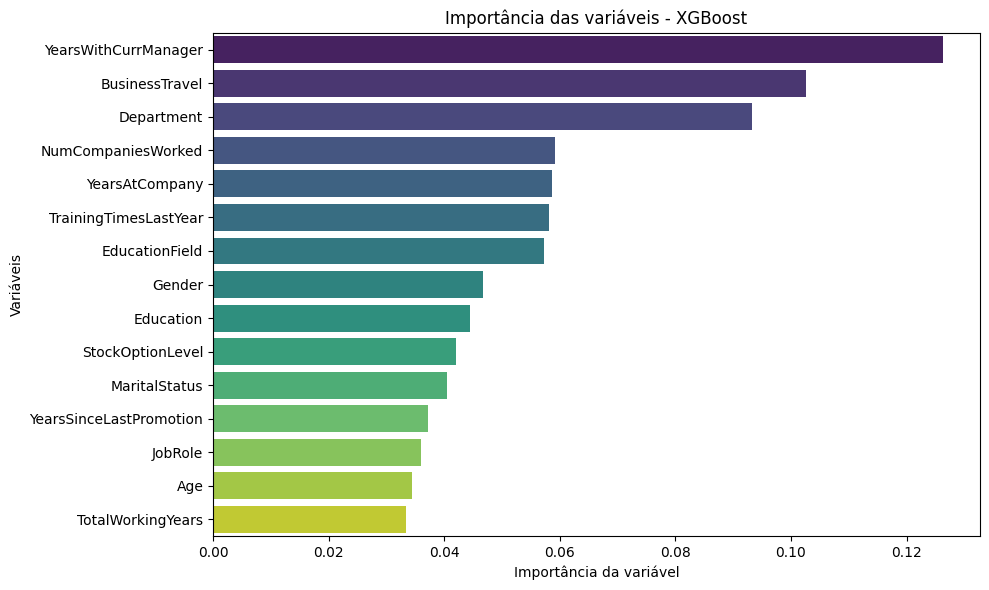

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_feature_importance(model, X, title):
    importances = model.feature_importances_
    feature_names = X.columns
    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15], palette='viridis')
    plt.title(title)
    plt.xlabel('Importância da variável')
    plt.ylabel('Variáveis')
    plt.tight_layout()
    plt.show()

# Exemplo para Random Forest
plot_feature_importance(model_rf, X_train_smote, "Importância das variáveis - Random Forest")

# Exemplo para XGBoost
plot_feature_importance(model_xgb, X_train_smote, "Importância das variáveis - XGBoost")

In [ ]:
import numpy as np
import pandas as pd

def importancia_logistic_regression(model, X, top_n=10):
    coefs = model.coef_[0]
    feature_names = X.columns
    coef_abs = np.abs(coefs)
    feat_imp = pd.Series(coefs, index=feature_names)
    feat_imp_abs = pd.Series(coef_abs, index=feature_names).sort_values(ascending=False)

    texto = f"As {top_n} variáveis mais importantes para o modelo Logistic Regression (coeficientes):\n"
    for i, feat in enumerate(feat_imp_abs.head(top_n).index, 1):
        valor = feat_imp[feat]
        texto += f"{i}. {feat} — coeficiente: {valor:.4f}\n"
    return texto

def importancia_tree_model(model, X, top_n=10):
    importances = model.feature_importances_
    feature_names = X.columns
    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    texto = f"As {top_n} variáveis mais importantes para o modelo {type(model).__name__} (feature importance):\n"
    for i, (feat, imp) in enumerate(feat_imp.head(top_n).items(), 1):
        texto += f"{i}. {feat} — importância: {imp:.4f}\n"
    return texto

# Executando para os 3 modelos
texto_lr = importancia_logistic_regression(model_lr, X_train_smote, top_n=10)
texto_rf = importancia_tree_model(model_rf, X_train_smote, top_n=10)
texto_xgb = importancia_tree_model(model_xgb, X_train_smote, top_n=10)

print(texto_lr)
print(texto_rf)
print(texto_xgb)

As 10 variáveis mais importantes para o modelo Logistic Regression (coeficientes):
1. Department — coeficiente: -0.4122
2. StockOptionLevel — coeficiente: -0.3876
3. MaritalStatus — coeficiente: 0.3875
4. JobLevel — coeficiente: -0.2804
5. Gender — coeficiente: -0.2505
6. TrainingTimesLastYear — coeficiente: -0.2496
7. EducationField — coeficiente: -0.1778
8. YearsWithCurrManager — coeficiente: -0.1691
9. BusinessTravel — coeficiente: -0.1294
10. NumCompaniesWorked — coeficiente: 0.1269

As 10 variáveis mais importantes para o modelo RandomForestClassifier (feature importance):
1. YearsAtCompany — importância: 0.0944
2. YearsWithCurrManager — importância: 0.0837
3. TotalWorkingYears — importância: 0.0832
4. Age — importância: 0.0777
5. MonthlyIncome — importância: 0.0747
6. NumCompaniesWorked — importância: 0.0686
7. DistanceFromHome — importância: 0.0549
8. BusinessTravel — importância: 0.0484
9. TrainingTimesLastYear — importância: 0.0480
10. JobRole — importância: 0.0476

As 10 vari